Steps taken in the analysis : <br>
1. Importing the libraries <br>
2. Importing the dataset <br>
3. Exploring the dataset - Cleaning the data: <br>
  i. Checked for missing value <br>
  ii. Renamed the neccessary columns <br>
  iii. Checked for duplicated value <br>
  iv. Delete the duplicate value <br>
  v. Checked for the outlier <br>
  vi. Visualization the relationshipo between monthly works with number of project

Conclusion

1. The optimal number of project is between 3-5 <br>
2. Those who worked more than 250 hours have worked. <br>
3. Those who have worked in 7 projects have all left. <br>
4. Those who have worked for 240 hours montly and more has all left and have a low level of satisfaction <br>


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler

In [50]:
df=pd.read_csv('/content/HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [51]:
df.shape

(14999, 10)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [53]:
round(df.describe(),2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [54]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df.rename(columns={'Work_accident':'work_accident','Department':'department'}, inplace=True)

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [10]:
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [11]:
df.duplicated().sum()

3008

In [12]:
df.drop_duplicates(inplace=True, keep='first')

In [13]:
df.duplicated().sum()

0

In [15]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


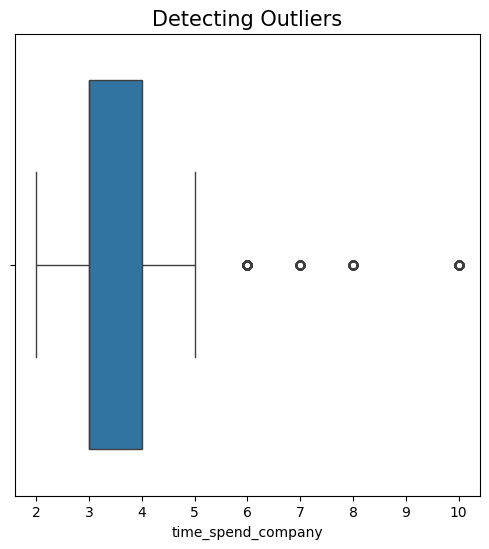

In [17]:
plt.figure(figsize=(6,6))
plt.title('Detecting Outliers', fontsize=15)
sns.boxplot(x=df['time_spend_company'])
plt.show()

In [19]:
p_25=df['time_spend_company'].quantile(0.25)
p_75=df['time_spend_company'].quantile(0.75)
iqr=p_75-p_25
u_limit=p_75+(1.5*iqr)
l_limit=p_25-(1.5*iqr)

In [20]:
print(u_limit)
print(l_limit)

5.5
1.5


In [21]:
outliers=df[(df['time_spend_company']>u_limit) | (df['time_spend_company']<l_limit)]
outliers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


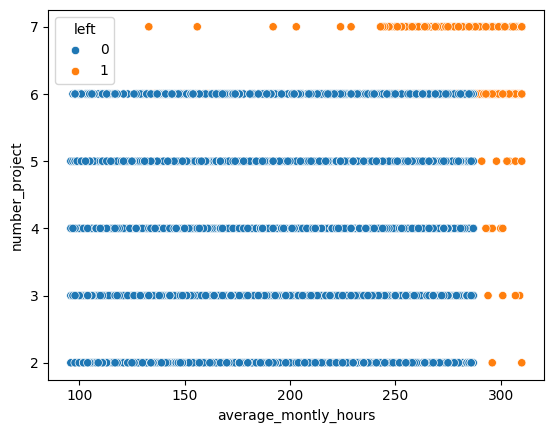

In [27]:
sns.scatterplot(data=df,x='average_montly_hours',y='number_project',hue='left')
plt.show()

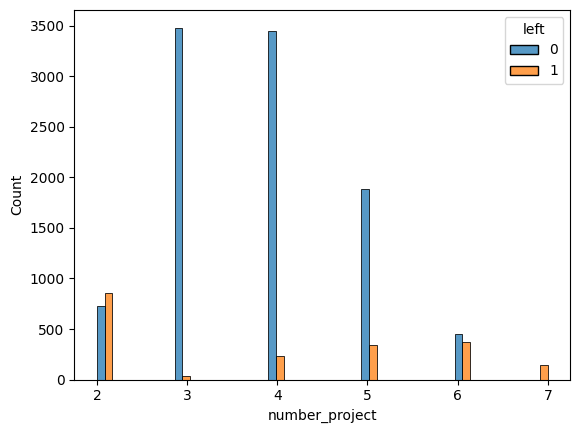

In [24]:
sns.histplot(data=df, x='number_project', hue='left',multiple='dodge')
plt.show()


In [25]:
df[df['number_project']==7]['left'].value_counts()

,count
left,
1,145


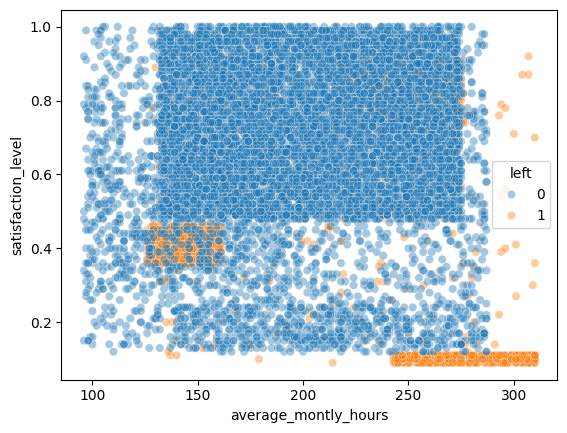

In [31]:
sns.scatterplot(data=df, x='average_montly_hours', y='satisfaction_level', hue='left',alpha=0.4)
plt.show()

In [32]:
df['department'].value_counts()

,count
department,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


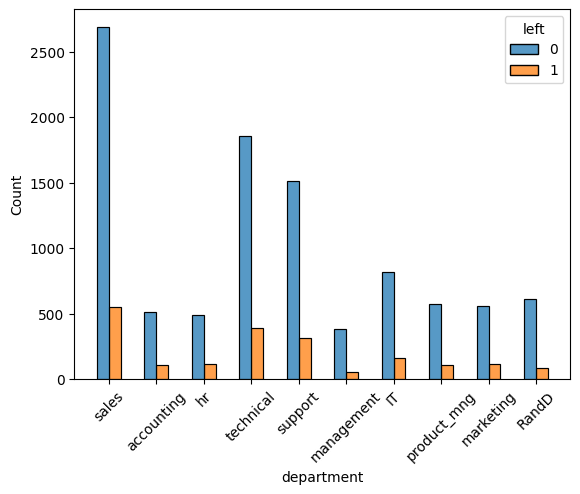

In [35]:
sns.histplot(data=df, x='department', hue='left', multiple='dodge',shrink=0.5)
plt.xticks(rotation=45)
plt.show()

In [36]:
df.groupby('left')['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


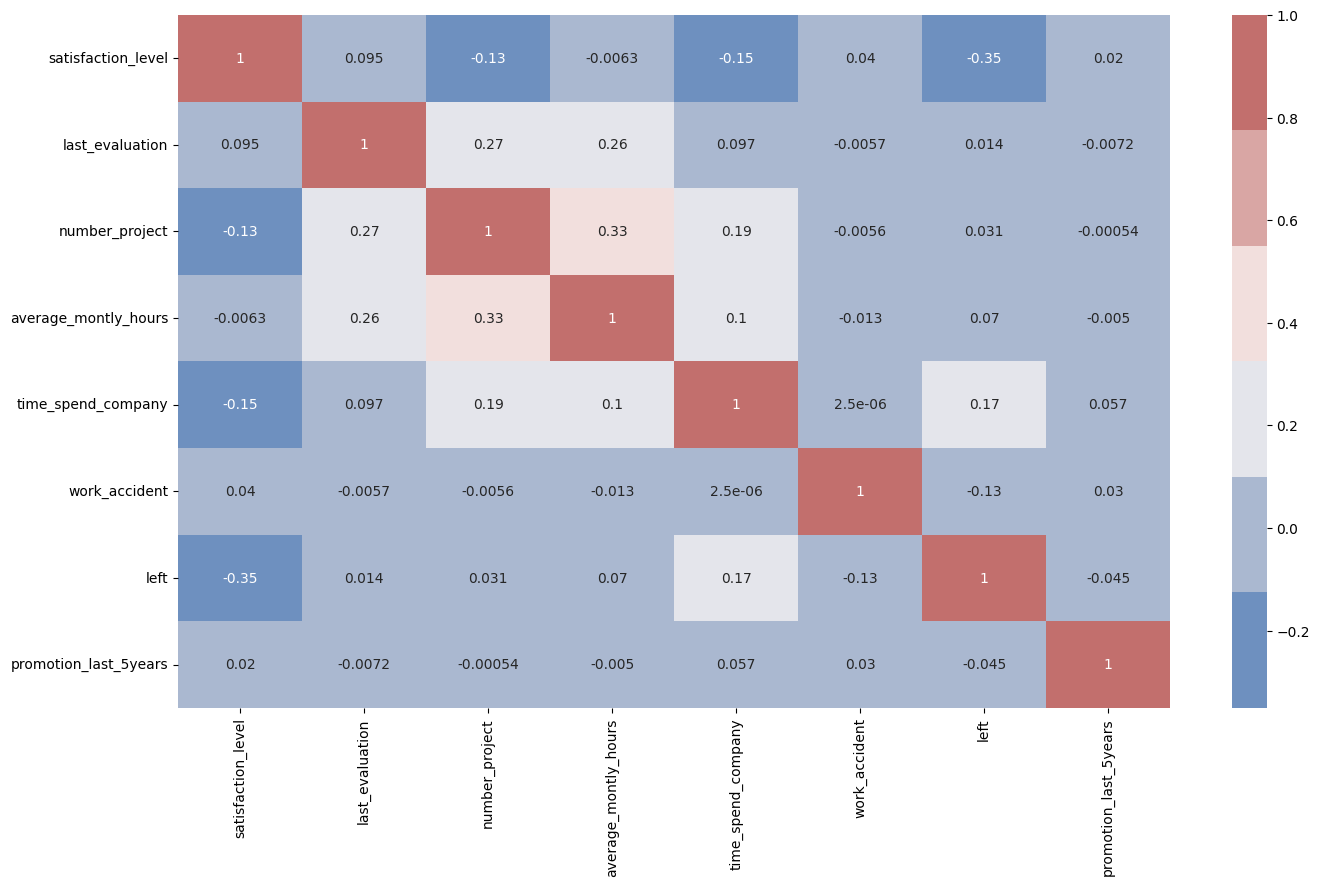

In [40]:
num_df=df.select_dtypes(include=np.number)
num_df

plt.figure(figsize=(16,9))
sns.heatmap(num_df.corr(), annot=True, cmap=sns.color_palette('vlag'))
plt.show()

In [41]:
df=pd.get_dummies(df, columns=['department','salary'],prefix=['salary','dept'], drop_first=True, dtype=int)

In [42]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_RandD,salary_accounting,salary_hr,salary_management,salary_marketing,salary_product_mng,salary_sales,salary_support,salary_technical,dept_low,dept_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,1,0,0,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [43]:
df.shape

(11991, 19)

In [46]:
df=df[(df['time_spend_company']>= l_limit) & (df['time_spend_company']<=u_limit)]

In [47]:
df.shape

(11167, 19)

In [48]:
X = df.drop('left', axis=1)
y = df['left']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [61]:
model=LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [62]:
y_pred=model.predict(X_test)

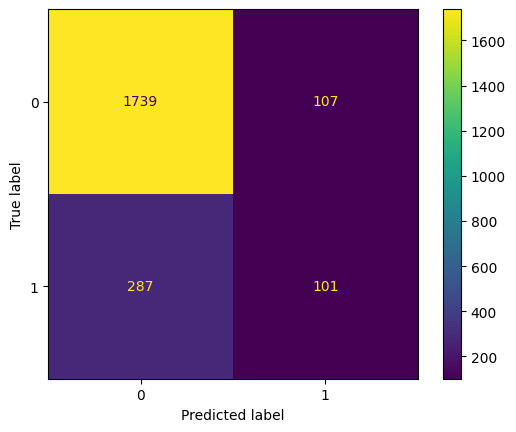

In [65]:
cm=confusion_matrix(y_test, y_pred,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [66]:
target_names=['stayed','left']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      stayed       0.86      0.94      0.90      1846
        left       0.49      0.26      0.34       388

    accuracy                           0.82      2234
   macro avg       0.67      0.60      0.62      2234
weighted avg       0.79      0.82      0.80      2234

